# Unsupervised scene decomposition

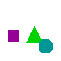

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader

import sys, os
sys.path.append(os.getcwd() + os.sep + os.pardir)
from utils import plot_examples

# Load tensors with the dataset
train_file = '../data/sprites_multi/data.pt'
dataset = TensorDataset(torch.load(train_file))
loader = DataLoader(dataset, batch_size=128, shuffle=False)

x = next(iter(loader))[0][:16]
_, im_channels, im_size, _ = x.shape
plot_examples(x[5:6], '')

In [3]:
from models import MONet

torch.set_grad_enabled(False)
model = MONet(im_size, im_channels, num_slots=5, z_dim=10, scale=0.25)
model.load_state_dict(torch.load('monet_sprites_multi.pt', map_location='cpu'));

In [4]:
*_, slots, masks = model(x)
recs = (slots * masks).sum(dim=1).reshape(-1, im_channels, im_size, im_size)
slots = slots.transpose(0, 1).reshape(-1, im_channels, im_size, im_size)
masks = masks.transpose(0, 1).reshape(-1 , 1, im_size, im_size)

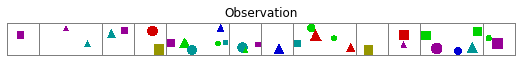

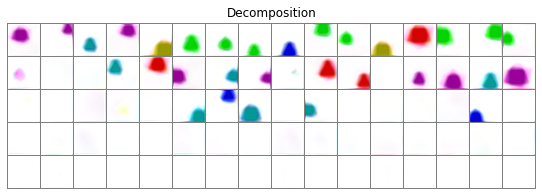

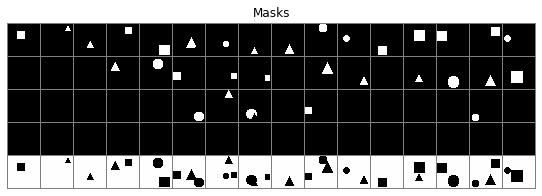

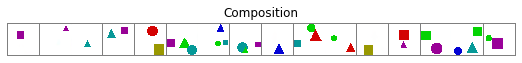

In [5]:
plt.figure()
plot_examples(x, 'Observation', num_cols=16)
plt.figure()
plot_examples(slots, 'Decomposition', num_cols=16)
plt.figure()
plot_examples(masks, 'Masks', num_cols=16)
plt.figure()
plot_examples(recs, 'Composition', num_cols=16)